In [2]:
import pandas as pd
df = pd.read_csv('student_performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [6]:
yes_no_dcit = {'Yes': 1, 'No': 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(yes_no_dcit)

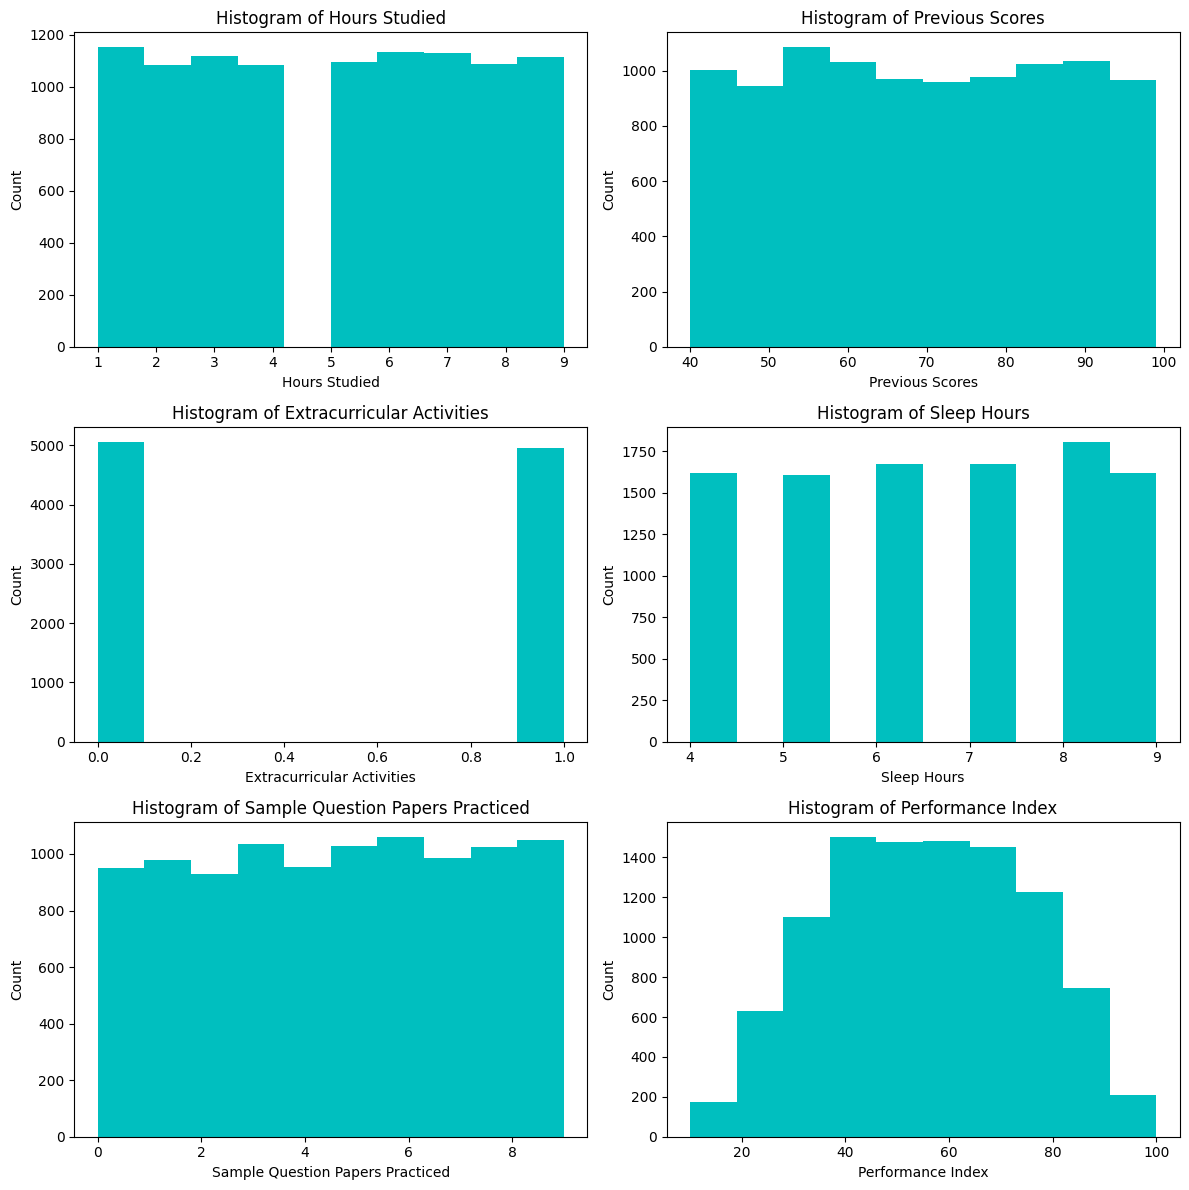

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
count = 1
for i in df.columns:
    plt.subplot(3,2,count)
    count +=1
    plt.hist(df[i], color='c')
    plt.title('Histogram of ' + i)
    plt.xlabel(i)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


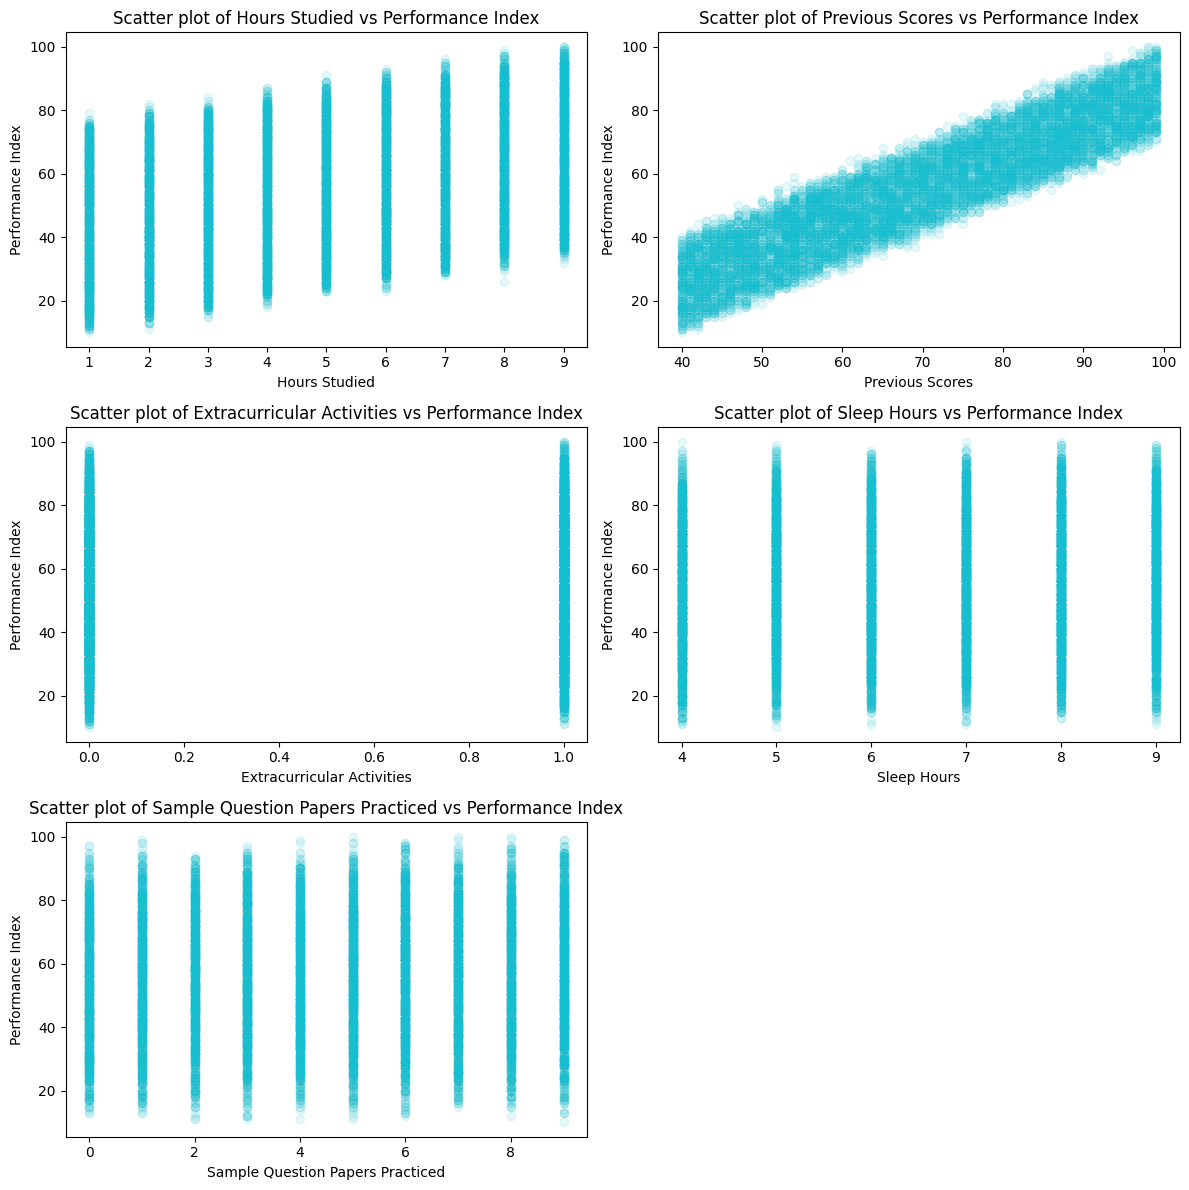

In [21]:
plt.figure(figsize=(12,12))
count = 1
input_features = df.columns[:-1]
output_features = df.columns[-1]
for i in input_features:
    plt.subplot(3,2,count)
    count +=1
    #plt.hist(df[i], color='c')
    plt.scatter(df[i], df[output_features], alpha = 0.1,  c= '#17becf')
    plt.title(f'Scatter plot of {i} vs {output_features}')
    plt.xlabel(i)
    plt.ylabel(output_features)
plt.tight_layout()
plt.show()

In [22]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Removing Columns Based on the Correlation Matrix

In [23]:
input_features = ['Hours Studied', 'Previous Scores']
X = df[input_features]
y = df[output_features]
print(f'Shape of X : {X.shape}')
print(f'Shape of y : {y.shape}')

Shape of X : (10000, 2)
Shape of y : (10000,)


0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7000, 2)
Shape of y_train : (7000,)
Shape of X_test : (3000, 2)
Shape of y_test : (3000,)


In [27]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = regr.predict(X_test)
(y_pred[:10], y_test[:10].values)

(array([55.77975615, 22.24257257, 47.82729314, 29.3903348 , 43.89939656,
        60.70915086, 47.78903587, 84.69448348, 37.56216111, 70.70816104]),
 array([51., 20., 46., 28., 41., 59., 48., 87., 37., 73.]))

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE of the model is: {mae}')

MAE of the model is: 1.8708312979090933


In [35]:
percentage_error = (mae/df['Performance Index'].mean()) * 100
print(f'The percentage error of the model is: {percentage_error} %')

The percentage error of the model is: 3.387665139410361 %


In [60]:
#import matplotlib.pylot as plt #type: ignore
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_train

,Hours Studied,Previous Scores
9069,4,99
2603,6,90
7738,8,57
1579,6,92
5058,6,64
...,...,...
5734,8,50
5191,4,68
5390,9,48
860,1,47


In [61]:
x_sample  = np.linspace(X_train['Hours Studied'].min(), X_train['Previous Scores'].max(), 100)
y_sample  = np.linspace(X_train['Hours Studied'].min(), X_train['Previous Scores'].max(), 90)
xx, yy = np.meshgrid(x_sample, y_sample)

flatten_xx = xx.ravel()
flatten_yy = yy.ravel()
input_plot_data = np.c_[flatten_xx, flatten_yy]
input_plot_data.shape

y_pred = regr.predict(input_plot_data)
y_pred[:10]


c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.43833747, 16.76342764, 19.15945599, 22.87188415, 26.32416212,
       27.4375139 , 30.39504701, 33.10786386, 36.55427534, 36.55427534])

In [62]:
y_pred = y_pred.reshape(xx.shape)

Text(0.5, 0.92, '3D Visualization of the data')

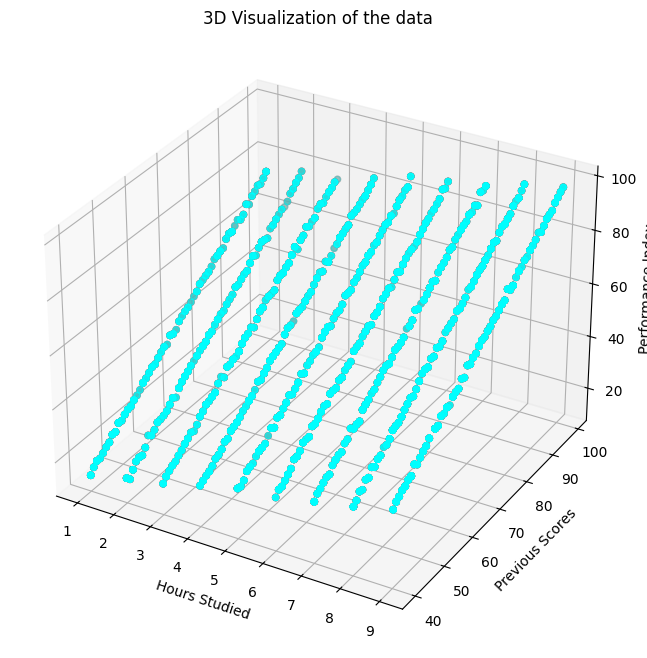

In [71]:
plt.ion()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_test['Hours Studied'], X_test['Previous Scores'], y_pred, color = 'red')
ax.scatter(X_test['Hours Studied'], X_test['Previous Scores'], y_pred, color = 'cyan')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
ax.set_title('3D Visualization of the data')
#ax.view_init(elev=0, azim = 0)